# 가위바위보 expo 


In [423]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4


In [424]:
# 224*224 -> 28*28 reshape

In [425]:
from PIL import Image,ImageOps
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [426]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

230  images to be resized.
230  images resized.
가위 이미지 resize 완료!


In [427]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

230  images to be resized.
230  images resized.
바위 이미지 resize 완료!


In [428]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

230  images to be resized.
230  images resized.
보 이미지 resize 완료!


In [429]:
import numpy as np

def load_data(img_path, number_of_data=690):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 690 입니다.
x_train shape: (690, 28, 28, 3)
y_train shape: (690,)


라벨:  0


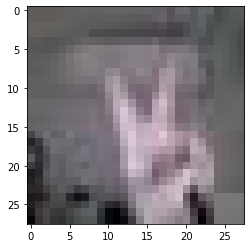

In [430]:
plt.imshow(x_train[15])
print('라벨: ', y_train[15])

In [431]:
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)


In [432]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Dropout, Dense

In [433]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=128
n_dense=64
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))

#model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu', input_shape=(28,28,3)))
#model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(Dropout(0.2)) # 드롭아웃 추가. 비율은 50%


model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()



Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 3, 3, 32)        

In [434]:



model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)



Epoch 1/30
22/22 [==============================] - 1s 4ms/step - loss: 1.1082 - accuracy: 0.3072
Epoch 2/30
22/22 [==============================] - 0s 4ms/step - loss: 1.0997 - accuracy: 0.3333
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 1.0983 - accuracy: 0.3652
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 1.0973 - accuracy: 0.3681
Epoch 5/30
22/22 [==============================] - 0s 4ms/step - loss: 1.0962 - accuracy: 0.3681
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 1.0857 - accuracy: 0.4261
Epoch 7/30
22/22 [==============================] - 0s 4ms/step - loss: 1.0747 - accuracy: 0.4203
Epoch 8/30
22/22 [==============================] - 0s 4ms/step - loss: 1.0767 - accuracy: 0.4087
Epoch 9/30
22/22 [==============================] - 0s 4ms/step - loss: 1.0493 - accuracy: 0.4826
Epoch 10/30
22/22 [==============================] - 0s 4ms/step - loss: 0.9893 - accuracy: 0.5159
Epoch 11/30
22/22 [

In [435]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

230  images to be resized.
230  images resized.
가위 이미지 resize 완료!


In [436]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

230  images to be resized.
230  images resized.
바위 이미지 resize 완료!


In [437]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

230  images to be resized.
230  images resized.
보 이미지 resize 완료!


In [438]:

def load_data_test(img_path, number_of_data=690):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 690 입니다.
x_test shape: (690, 28, 28, 3)
y_test shape: (690,)


In [439]:
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

In [440]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

22/22 - 0s - loss: 1.6626 - accuracy: 0.4014
test_loss: 1.6626386642456055 
test_accuracy: 0.4014492630958557


In [441]:
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis=1)

[321, 576, 19, 450, 7, 505, 644, 112, 631, 581, 28, 201, 503, 147, 479, 80, 69, 649, 511, 212, 471, 606, 615, 576, 32, 425, 131, 547, 222, 270, 96, 226, 129, 29, 385, 441, 429, 336, 625, 293, 463, 246, 180, 22, 472, 541, 689, 630, 344, 634]
예측확률분포 : [0.8168666  0.00476888 0.17836449]
라벨 : 1, 예측결과: 0


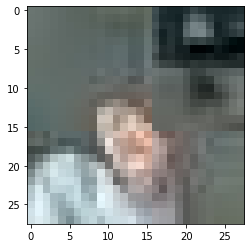

예측확률분포 : [0.86304253 0.02177339 0.11518411]
라벨 : 2, 예측결과: 0


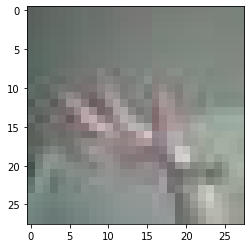

예측확률분포 : [0.13692158 0.7289124  0.134166  ]
라벨 : 0, 예측결과: 1


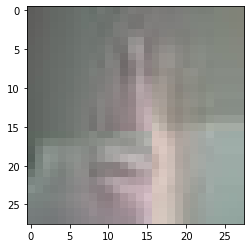

예측확률분포 : [0.63837796 0.19909139 0.16253063]
라벨 : 1, 예측결과: 0


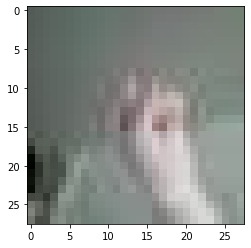

예측확률분포 : [0.0960771  0.8116609  0.09226199]
라벨 : 0, 예측결과: 1


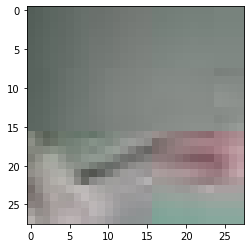

예측확률분포 : [0.9077503  0.01657389 0.07567575]
라벨 : 2, 예측결과: 0


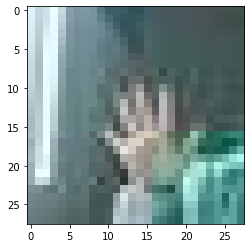

예측확률분포 : [0.77101433 0.04890293 0.18008275]
라벨 : 2, 예측결과: 0


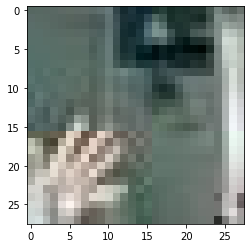

예측확률분포 : [0.00512246 0.98874193 0.00613554]
라벨 : 0, 예측결과: 1


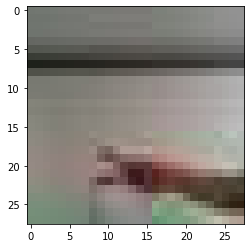

예측확률분포 : [0.0720246  0.88766414 0.04031133]
라벨 : 2, 예측결과: 1


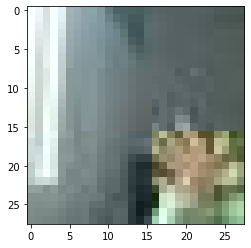

예측확률분포 : [0.60255545 0.06735384 0.3300908 ]
라벨 : 2, 예측결과: 0


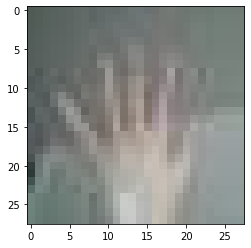

예측확률분포 : [0.3882609  0.3951548  0.21658428]
라벨 : 0, 예측결과: 1


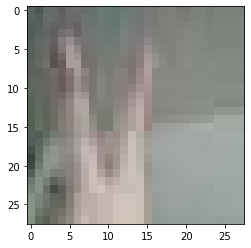

예측확률분포 : [0.0366535  0.89635956 0.06698691]
라벨 : 0, 예측결과: 1


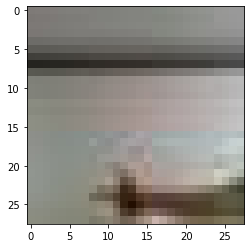

예측확률분포 : [6.1540151e-05 9.9967670e-01 2.6184446e-04]
라벨 : 2, 예측결과: 1


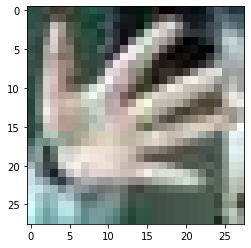

예측확률분포 : [0.30578956 0.3907726  0.30343786]
라벨 : 0, 예측결과: 1


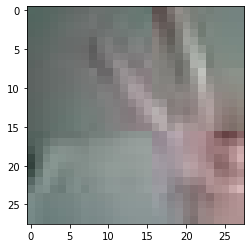

예측확률분포 : [0.59145457 0.0668554  0.34169003]
라벨 : 2, 예측결과: 0


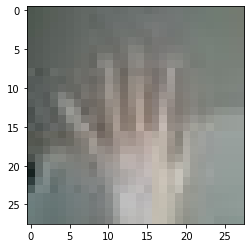

예측확률분포 : [0.18445893 0.7928448  0.02269619]
라벨 : 0, 예측결과: 1


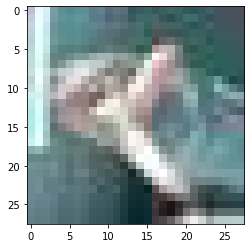

예측확률분포 : [0.3039015  0.47150713 0.22459131]
라벨 : 0, 예측결과: 1


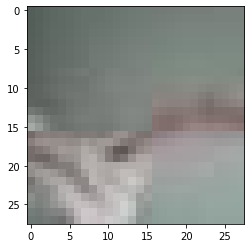

예측확률분포 : [0.01412828 0.97152966 0.01434201]
라벨 : 2, 예측결과: 1


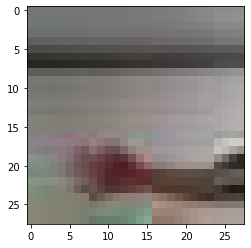

예측확률분포 : [0.52454966 0.16111311 0.31433716]
라벨 : 2, 예측결과: 0


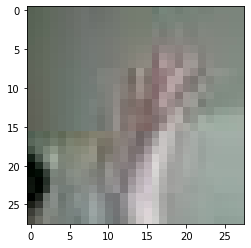

예측확률분포 : [0.04061888 0.92744493 0.03193619]
라벨 : 0, 예측결과: 1


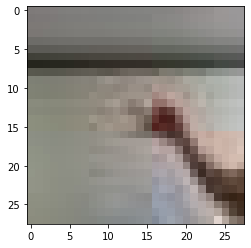

예측확률분포 : [0.9554627  0.00359729 0.04093996]
라벨 : 2, 예측결과: 0


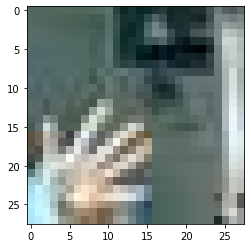

예측확률분포 : [0.5394016  0.02984405 0.43075433]
라벨 : 2, 예측결과: 0


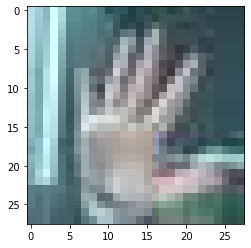

예측확률분포 : [0.0129421  0.980412   0.00664592]
라벨 : 2, 예측결과: 1


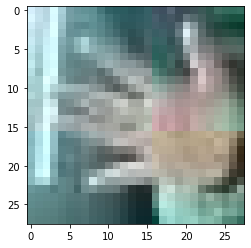

예측확률분포 : [0.86304253 0.02177339 0.11518411]
라벨 : 2, 예측결과: 0


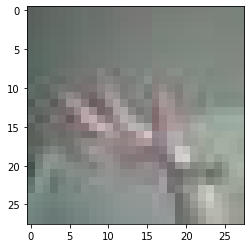

예측확률분포 : [0.06199807 0.87958896 0.05841299]
라벨 : 0, 예측결과: 1


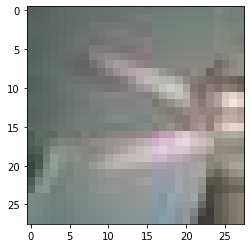

예측확률분포 : [0.05796025 0.23185761 0.7101822 ]
라벨 : 1, 예측결과: 2


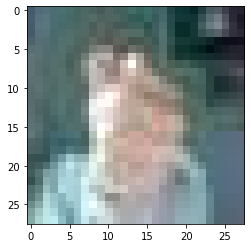

예측확률분포 : [0.00768837 0.9866729  0.00563878]
라벨 : 0, 예측결과: 1


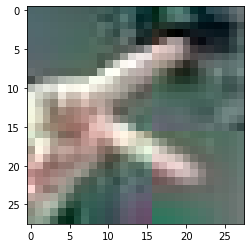

예측확률분포 : [0.86085373 0.01999494 0.11915139]
라벨 : 2, 예측결과: 0


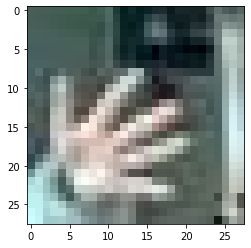

예측확률분포 : [0.01691062 0.96782726 0.01526208]
라벨 : 0, 예측결과: 1


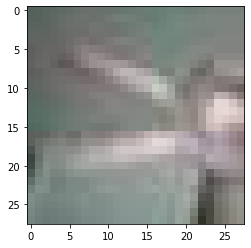

예측확률분포 : [0.7719258  0.12412133 0.10395285]
라벨 : 1, 예측결과: 0


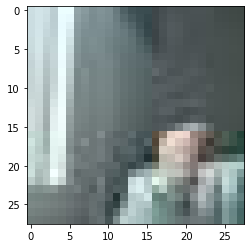

예측확률분포 : [0.06190996 0.90436214 0.03372801]
라벨 : 0, 예측결과: 1


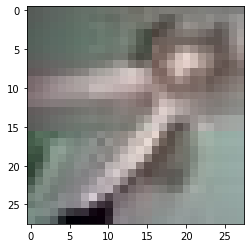

예측확률분포 : [0.28729734 0.4878577  0.22484499]
라벨 : 0, 예측결과: 1


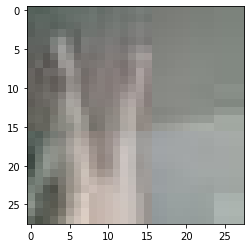

예측확률분포 : [0.34064645 0.00421518 0.6551384 ]
라벨 : 0, 예측결과: 2


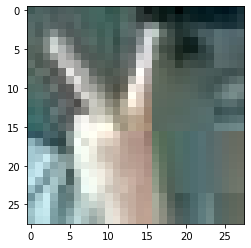

예측확률분포 : [0.05965206 0.83338195 0.10696594]
라벨 : 0, 예측결과: 1


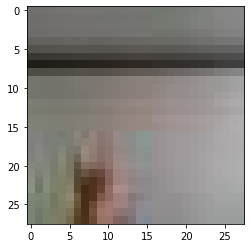

예측확률분포 : [0.61448973 0.06681222 0.31869805]
라벨 : 1, 예측결과: 0


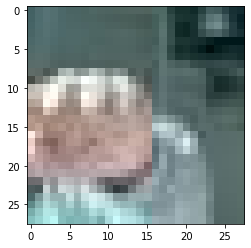

예측확률분포 : [0.67044646 0.08037364 0.24917988]
라벨 : 1, 예측결과: 0


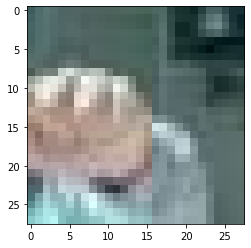

예측확률분포 : [0.9429647  0.01959714 0.0374382 ]
라벨 : 1, 예측결과: 0


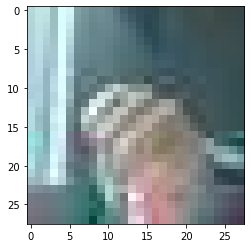

예측확률분포 : [0.46049926 0.40173757 0.13776322]
라벨 : 1, 예측결과: 0


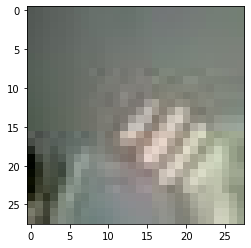

예측확률분포 : [0.8340377  0.09974668 0.0662156 ]
라벨 : 2, 예측결과: 0


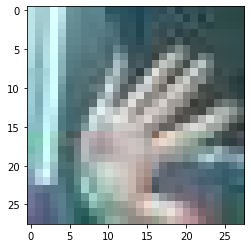

예측확률분포 : [0.82621866 0.1512891  0.02249226]
라벨 : 1, 예측결과: 0


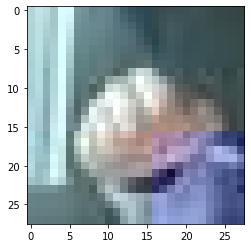

예측확률분포 : [0.33271554 0.3839106  0.28337383]
라벨 : 2, 예측결과: 1


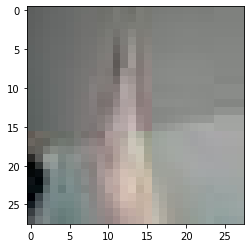

예측확률분포 : [0.69715726 0.14978218 0.15306053]
라벨 : 1, 예측결과: 0


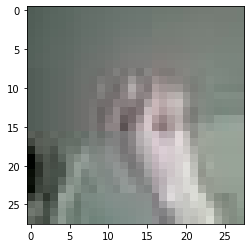

예측확률분포 : [0.04164513 0.91815484 0.0402    ]
라벨 : 0, 예측결과: 1


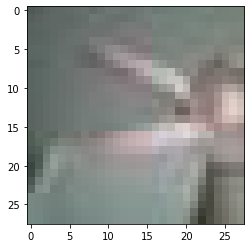

예측확률분포 : [0.03313257 0.94811416 0.01875323]
라벨 : 0, 예측결과: 1


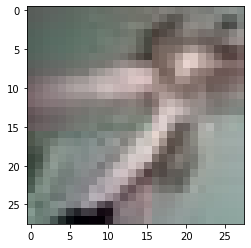

예측확률분포 : [0.07465111 0.82065547 0.10469343]
라벨 : 2, 예측결과: 1


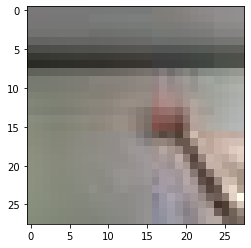

예측확률분포 : [0.08292254 0.87268186 0.04439566]
라벨 : 2, 예측결과: 1


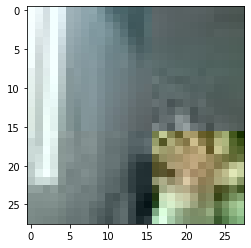

예측확률분포 : [0.12858644 0.830631   0.04078253]
라벨 : 2, 예측결과: 1


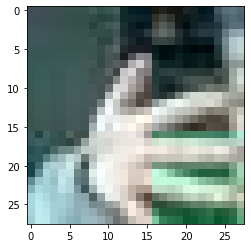

예측확률분포 : [0.9088092  0.01377414 0.0774166 ]
라벨 : 2, 예측결과: 0


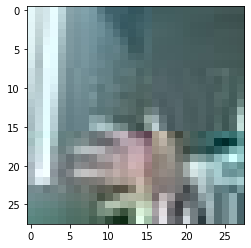

예측확률분포 : [0.91083854 0.00573869 0.08342277]
라벨 : 1, 예측결과: 0


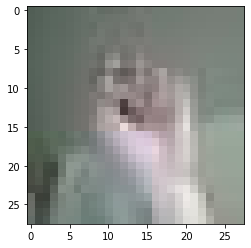

예측확률분포 : [0.00930854 0.9862955  0.0043959 ]
라벨 : 2, 예측결과: 1


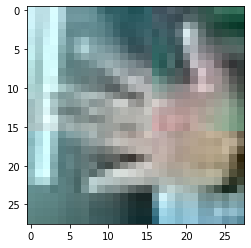

In [442]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
#i번째 test_labels와 y_test가 다른 경우만 모아보자
    if predicted_labels[i] != y_test[i]:
        
        wrong_predict_list.append(i)

        
#wrong_predict_list에서 랜덤 5개만 뽑아보자
samples = random.choices(population = wrong_predict_list, k=50)
print(samples) #index값을 저장해놓은 wrong_predict_list에서 랜덤 5개 뽑앗으므로 결국 index값만 각 결과, 라벨에 넣어주면 나온다.

for n in samples:
    print("예측확률분포 : " + str(predicted_result[n]))
    print("라벨 : "+ str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

#0 가위, 1 바위 2 보

# 회고 

실수로 사진 찍다가 230개를 사용해 버려서 그냥 230개로 맞추기로 했다 
train data에 대한 정확도는 높게 나왔다 나는 230개 총 690개의 데이터를 사용했기 때문에 다른 그루분들의 데이터를 test로 사용할때
230개로 맞춰야 했다 그래서 2명의 그루분꺼와 한명의 그루분꺼 30개를 가지고 230개를 맞추었고 
test로 돌린 결과 좋지 40%를 넘지 못했다 처음에는 오버피팅 문제인가 해서 drop율도 높혀서 오버피팅을 방지 해주었지만 
여전히 좋지 않은 결과밖에 나오지 않았다 이유는 무엇인지 지금은 모르겠지만 추후에 업로드 해서 성능을 높히는 방향으로 가야 할것같다 




